## Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

#Load dataset

In [3]:
import io
#from google.colab import files
#uploaded = files.upload()

dataset = pd.read_csv('data/train.csv')#pd.read_csv(io.BytesIO(uploaded['titanic.csv']), header=0)
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Variables Description

| Variable|Description|
|:---:|----------:|
|survival|	Survival	0 = No, 1 = Yes
|pclass	|Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
|sex	|Sex	
|Age	|Age in years	
|sibsp|	# of siblings / spouses aboard the Titanic	
|parch|	# of parents / children aboard the Titanic	
|ticket|	Ticket number	
|fare	|Passenger fare	
|cabin|	Cabin number	
|embarked|	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing Data

Determine those columns with missing values

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
imp = SimpleImputer(strategy="most_frequent")
array_transformation=imp.fit_transform(dataset.loc[:,['Age','Cabin','Embarked']])
dataset["Age"]=array_transformation[:,0]
dataset["Cabin"]=array_transformation[:,1]
dataset["Embarked"]=array_transformation[:,2]
dataset["Age"]=dataset["Age"].astype(int)
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


Transform label values

In [9]:
#Processing categorical variables
to_be_encoded=dataset.loc[:,['Sex','Cabin','Embarked']]

le_s = preprocessing.LabelEncoder()
encoded_sex=le_s.fit_transform(to_be_encoded['Sex'])
dataset['Sex']=encoded_sex

le_c = preprocessing.LabelEncoder()
encoded_cabin=le_c.fit_transform(to_be_encoded['Cabin'])
dataset['Cabin']=encoded_cabin

le_e = preprocessing.LabelEncoder()
encoded_emb=le_c.fit_transform(to_be_encoded['Embarked'])
dataset['Embarked']=encoded_emb




In [10]:
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.551066,0.523008,0.381594,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.207013,1.102743,0.806057,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,146.000000,2.000000


In [11]:
dataset.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.052883
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Cabin          0.175690
Embarked      -0.167675
Name: Survived, dtype: float64

<AxesSubplot:>

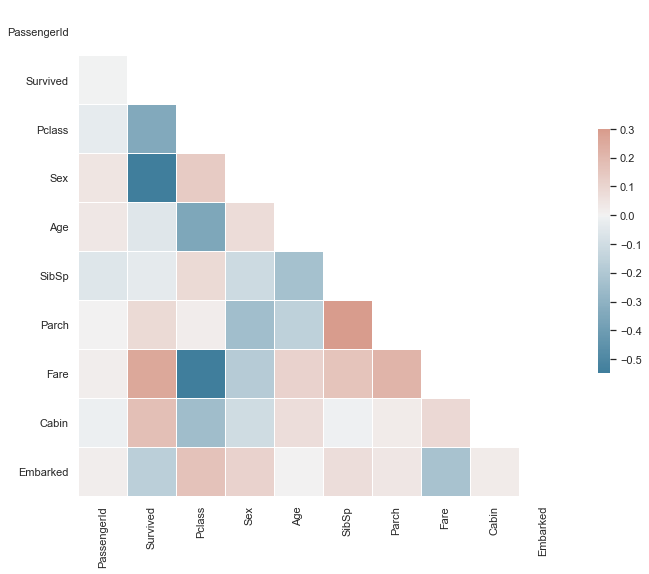

In [12]:
correlation_matrix=dataset.iloc[:,0:13].corr(method="pearson") #Use only predictor variables
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Feature Selection

## Sort correlations

In [13]:
correlation_matrix['Survived'].sort_values(ascending=False)
my_filter=correlation_matrix['Survived']>=0
print(correlation_matrix.loc[my_filter, 'Survived'].sort_values(ascending=False))
my_filter=correlation_matrix['Survived']<0
print(correlation_matrix.loc[my_filter, 'Survived'].sort_values(ascending=True))

Survived    1.000000
Fare        0.257307
Cabin       0.175690
Parch       0.081629
Name: Survived, dtype: float64
Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.052883
SibSp         -0.035322
PassengerId   -0.005007
Name: Survived, dtype: float64


## Choose the most correlated variables as predictors

In [14]:
columns=['Fare', 
'Cabin',
'Sex',
'Pclass',
'Embarked']           
X = dataset.loc[:,columns] #predictors
y = dataset.loc[:,'Survived'] #outcome


## Define Training and Test Datasets

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training %d instances"%(x_train.shape[0]))
print("Test %d instances"%(x_test.shape[0]))

Training 668 instances
Test 223 instances


#Random Forest

In [16]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
acc=metrics.accuracy_score(y_test, pred)
print(acc)


0.7488789237668162


In [17]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train)

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.79 (+/-0.056) for {'max_depth': 2, 'n_estimators': 5}
0.777 (+/-0.073) for {'max_depth': 2, 'n_estimators': 50}
0.778 (+/-0.07) for {'max_depth': 2, 'n_estimators': 250}
0.799 (+/-0.089) for {'max_depth': 4, 'n_estimators': 5}
0.814 (+/-0.083) for {'max_depth': 4, 'n_estimators': 50}
0.819 (+/-0.076) for {'max_depth': 4, 'n_estimators': 250}
0.805 (+/-0.058) for {'max_depth': 8, 'n_estimators': 5}
0.814 (+/-0.048) for {'max_depth': 8, 'n_estimators': 50}
0.822 (+/-0.048) for {'max_depth': 8, 'n_estimators': 250}
0.795 (+/-0.06) for {'max_depth': 16, 'n_estimators': 5}
0.796 (+/-0.053) for {'max_depth': 16, 'n_estimators': 50}
0.79 (+/-0.06) for {'max_depth': 16, 'n_estimators': 250}
0.807 (+/-0.079) for {'max_depth': 32, 'n_estimators': 5}
0.79 (+/-0.06) for {'max_depth': 32, 'n_estimators': 50}
0.799 (+/-0.055) for {'max_depth': 32, 'n_estimators': 250}
0.801 (+/-0.061) for {'max_depth': None, 'n_estimators': 5}
0.798 (+/-0.06) for

#Foundation of Ensambling Methods


## Marginal Training



In [18]:
#Create models
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= GaussianNB()
#Training
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

GaussianNB()

## 0. Marginal predictions  

In [20]:

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

for i in range(0,len(x_test)):
    print([pred1[i], pred2[i], pred3[i]])
print("Marginals Accuracies")



[1, 1, 1]
[0, 0, 0]
[1, 0, 1]
[1, 1, 0]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[1, 0, 1]
[0, 1, 1]
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 1, 1]
[0, 0, 0]
[1, 1, 0]
[0, 1, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[0, 1, 1]
[1, 0, 0]
[1, 1, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 0, 0]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 1, 0]
[1, 1, 1]
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[1, 0, 0]
[1, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 1, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 1, 0]
[0, 0, 0]
[0, 1, 1]
[0, 0, 1]
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 1, 1]
[0, 0, 0]
[1, 0, 1]
[0, 0, 0]
[1, 0, 1]
[0, 0, 0]
[1, 0, 1]
[1, 1, 1]
[0, 1, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 1, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 0, 1]
[0, 0, 0]
[0, 0, 0]


### Visualization of predictions

DT0.7982062780269058
KN0.7488789237668162
NB0.7399103139013453


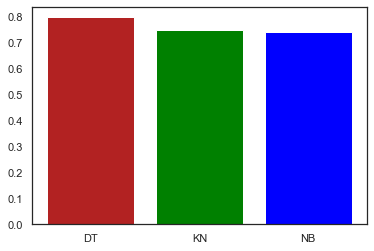

In [21]:
#Function to visualize results
def plot_prediction(prediction, labels):
    levels = np.arange(len(labels))
    # Create bars
    plt.bar(levels, prediction, color=['firebrick', 'green', 'blue'] )
     # Create names on the x-axis
    plt.xticks(levels, labels)
    # Show graphic
    plt.show()
    
#Visualization
names_models=['DT','KN','NB']
predictions=[pred1, pred2, pred3]
accuracies=[]
model_index=0

for m in names_models:
    acc=metrics.accuracy_score(y_test, predictions[model_index])
    accuracies.append(acc)
    model_index+=1
    print(m+str(acc))


#Visualize Accuracy
plot_prediction(accuracies, names_models)
#print("New visitor: propensity :",classifier.predict_proba(browsing_data)[:,1] )

## 1. Max Voting Technique

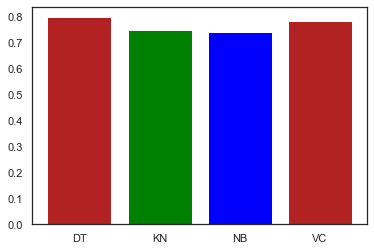

Global Accuracy:0.7847533632286996


In [22]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('dt', model1), ('kn', model2),('nb', model3)], voting='hard')
model.fit(x_train,y_train)

acc=model.score(x_test,y_test)
accuracies.append(acc)
names_models.append("VC")
plot_prediction(accuracies, names_models)
print("Global Accuracy:"+str(acc))

## 2. Average Technique
In this technique the prediction is averaged. Since usually in classification problems, the prediction is a categorical value, we have to transform such a
prediction into a real value as the probability of the classes. 

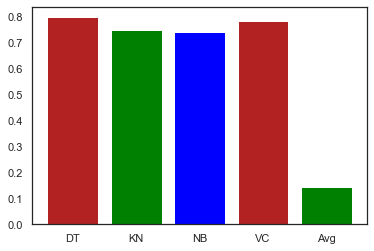

Global Accuracy:0.14349775784753363


In [23]:
#The meth0d predict_proba is different to predict. 
#This returns the probability of the clases
pred1=model1.predict_proba(x_test) 
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)
finalpred=[]
for i in range(0, len(pred1)):
    averages=(pred1[i,:]+pred2[i,:]+pred3[i,:])/3
    finalpred.append(np.argmax(averages)+1)

finalpred=np.array(finalpred)

acc=metrics.accuracy_score(y_test, finalpred)
accuracies.append(acc)
names_models.append("Avg")
plot_prediction(accuracies, names_models)
print("Global Accuracy:"+str(acc))


## 3. Stacking Techniques

In [27]:
from sklearn.model_selection import StratifiedKFold 
#Encapsulted in a function
def Stacking(model,train,y,test,n_fold):
    #Step 1:Define the K-folds parameters
    folds=StratifiedKFold(n_splits=n_fold,random_state=None)
    
    #Step 2:Define arrays to storage test predictions and train prediction  
    test_pred=np.empty((0,1),float)
    train_pred=np.empty((0,1),float)
    
    #Step 3 Split the train dataset into k-folds, train with k-1 folds and validate
    #with the remain fold.  
    
    for train_indices,val_indices in folds.split(train,y.values):
        #Determine the training and validation datasets based on the splits
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        #Train the model using training data
        model.fit(X=x_train,y=y_train)
        #Predict using validation data
        train_pred=np.append(train_pred,model.predict(x_val))
    #Predict using validation data
    test_pred=np.append(test_pred,model.predict(test))
    
    return test_pred,train_pred
  

Using stacking approach

Level 1, model 1

In [28]:
model1 = DecisionTreeClassifier(random_state=1)
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)
train_pred1=pd.DataFrame(train_pred1) #New train dataset
test_pred1=pd.DataFrame(test_pred1)   #New test  dataset
print(train_pred1.shape)
print(test_pred1.shape)

(668, 1)
(223, 1)


Level 1, model 2

In [29]:
model2 = KNeighborsClassifier()
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)
train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

print(train_pred2.shape)
print(test_pred2.shape)

(668, 1)
(223, 1)


Level 2, metamodel

Global Accurracy:0.8026905829596412


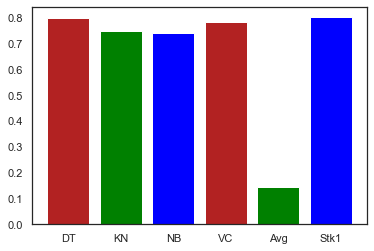

In [30]:
from sklearn.linear_model import LogisticRegression
df_train = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)
model3 = LogisticRegression(random_state=1)
model3.fit(df_train,y_train)
df_train.shape
y_train.shape
pd.concat([df_train.reset_index(),pd.DataFrame(y_train)], axis=1)
final_predictions=model3.predict(df_test)
print("Global Accurracy:"+str(metrics.accuracy_score(y_test, final_predictions)))
#Visualization
acc=metrics.accuracy_score(y_test, final_predictions)
accuracies.append(acc)
names_models.append("Stk1")
plot_prediction(accuracies, names_models)


## Use sklearn implementation

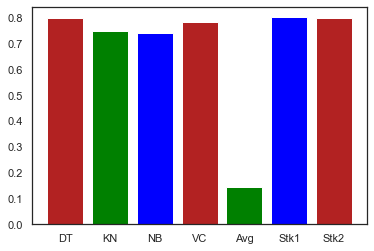

In [31]:
estimators=[
    ('DT',model1),('KN', model2)
]

clf = StackingClassifier(estimators=estimators,cv=10, stack_method='predict',final_estimator=model3)
acc=clf.fit(x_train,y_train).score(x_test,y_test)
accuracies.append(acc)
names_models.append("Stk2")
plot_prediction(accuracies, names_models)

# Advanced Techniques
## Next Sesion (June 20)

BAGGING

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.8026905829596412

BOOSTING

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.7399103139013453

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7802690582959642

In [35]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
model.fit(x_train, y_train);
model.score(x_test,y_test)

0.43191234033870574